In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import math




In [ ]:
# Loading the dt set
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


image_folder = './fashion_images'
if not os.path.exists(image_folder): #creating folder
    os.makedirs(image_folder)
for i, image in enumerate(x_train):
    image_path = os.path.join(image_folder, f'train_{i}.jpg')
    img = tf.keras.preprocessing.image.array_to_img(image.reshape((28, 28, 1)))
    img.save(image_path) #converting it into jpg folder
for i, image in enumerate(x_test):
    image_path = os.path.join(image_folder, f'test_{i}.jpg')
    img = tf.keras.preprocessing.image.array_to_img(image.reshape((28, 28, 1)))
    img.save(image_path)  # Convert testing images to JPG and save in the image folder
# Load images from the image folder
train_images = []
test_images = []
# Load training images
for i in range(len(x_train)):
    image_path = os.path.join(image_folder, f'train_{i}.jpg')
    # img = load_img(image_path, color_mode='grayscale', target_size=(28, 28))
    img = load_img(image_path, target_size=(28, 28))
    img_array = img_to_array(img)
    train_images.append(img_array)
# Load testing images
for i in range(len(x_test)):
    image_path = os.path.join(image_folder, f'test_{i}.jpg')
    # img = load_img(image_path, color_mode='grayscale', target_size=(28, 28))
    img = load_img(image_path, target_size=(28, 28))
    img_array = img_to_array(img)
    test_images.append(img_array)
# Convert image lists to numpy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)
# Print the shape of the loaded data
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training images shape: (60000, 28, 28, 3)
Testing images shape: (10000, 28, 28, 3)
Training labels shape: (60000,)
Testing labels shape: (10000,)


In [ ]:

class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
    10: "Hat",
    11: "Glove",
    12: "Socks",
    13: "Scarf",
    14: "Dress shoes",
    15: "Sweater",
    16: "Jumpsuit",
    17: "Blazer",
    18: "Bootcut pants",
    19: "Belt",
    20: "Cardigan",
    21: "Earrings",
    22: "Hoodie",
    23: "Jeans",
    24: "Necklace",
    25: "Oxford shoes",
    26: "Polo shirt",
    27: "Ring",
    28: "Shorts",
    29: "Shoulder bag",
    30: "Sunglasses",
    31: "Tank top",
    32: "Tie",
    33: "Tracksuit",
    34: "Watch",
    35: "Wedding dress",
    36: "Ballet flats",
    37: "Blouse",
    38: "Bucket bag",
    39: "Cap",
    40: "Cropped pants",
    41: "Espadrilles",
    42: "Flip-flops",
    43: "Handbag",
    44: "High heels",
    45: "Laptop bag",
    46: "Mules",
    47: "Pleated skirt",
    48: "Sandals",
    49: "Tote bag"
}



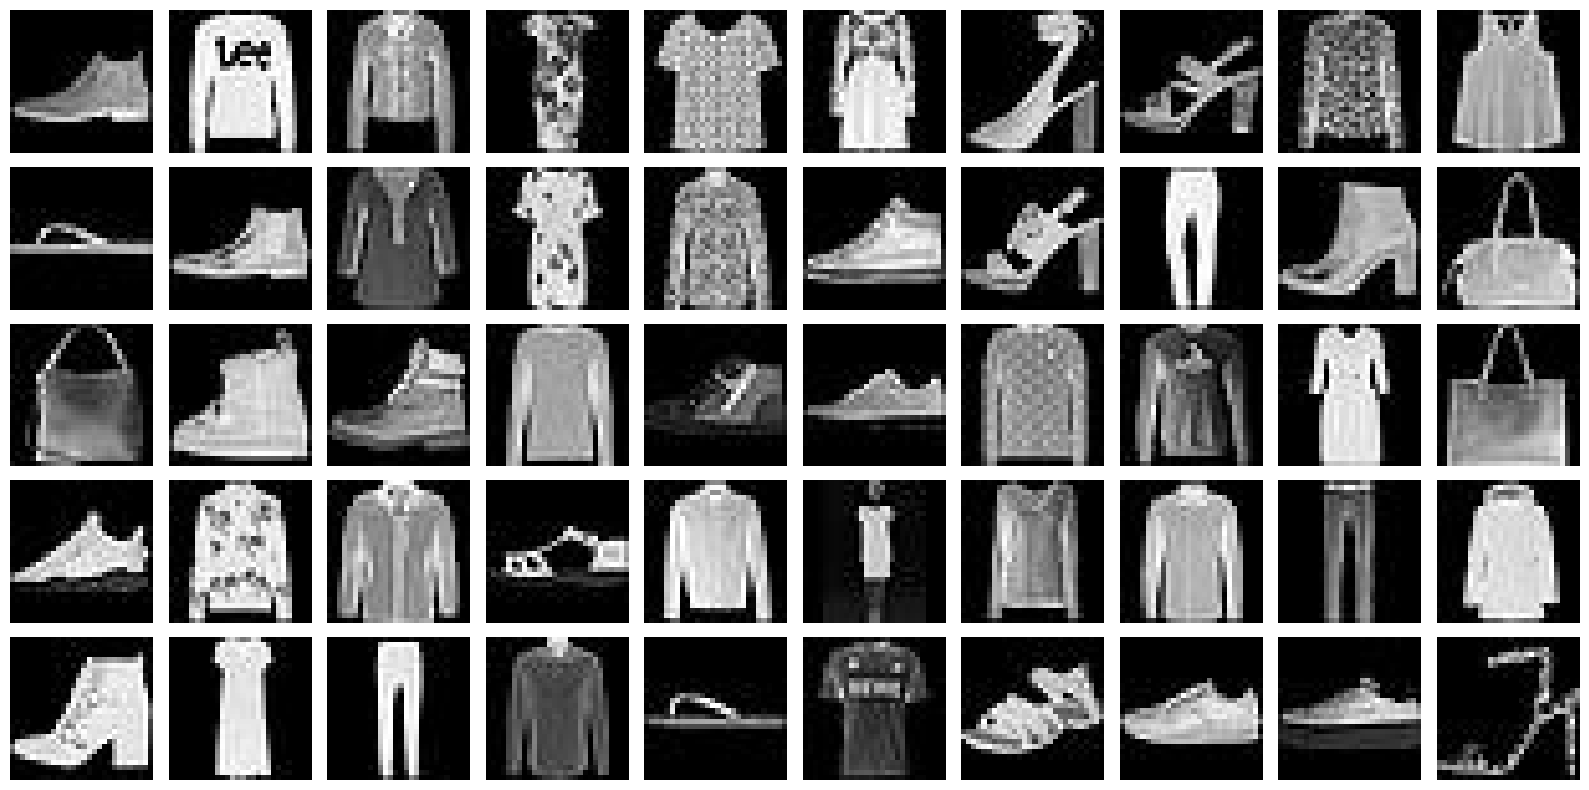

In [ ]:
# Image folder path
image_folder = "./fashion_images"
num_images_to_display = 50
image_files = sorted(os.listdir(image_folder))
# Calculate the number of rows and columns in the grid layout
num_rows = int(math.ceil(num_images_to_display / 10))
num_cols = 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

# Iterate over the selected image files and display them
for i, image_file in enumerate(image_files[:num_images_to_display]):
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Load and display the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    # axes[row_idx, col_idx].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[row_idx, col_idx].imshow(image)
    axes[row_idx, col_idx].axis("off")
plt.tight_layout()
plt.show()


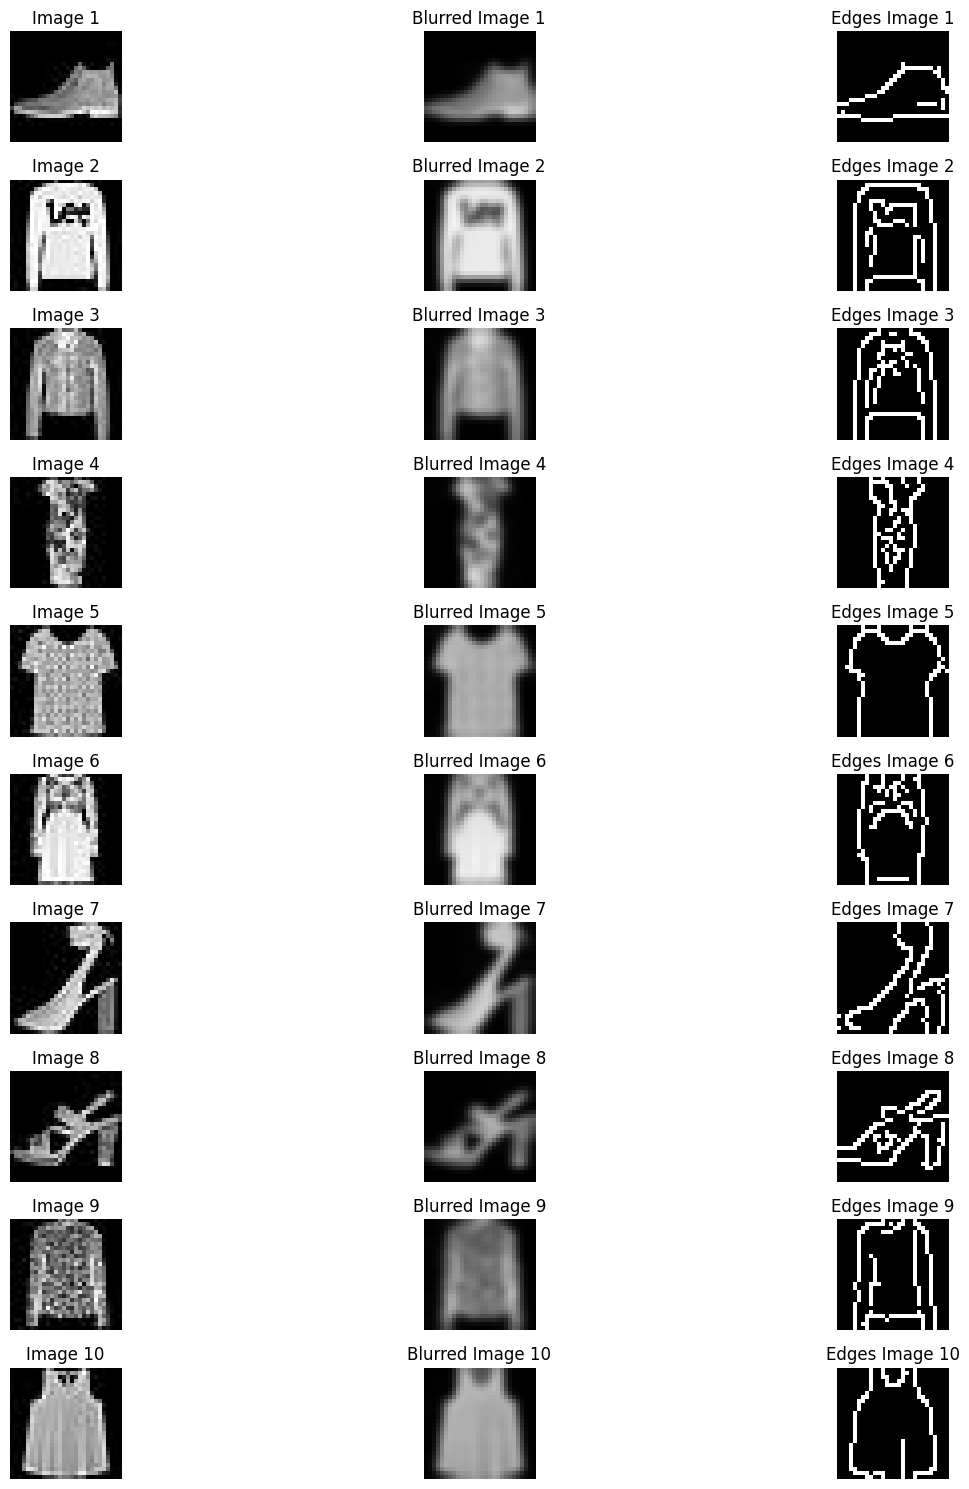

In [ ]:
image_folder = "/content/fashion_images"

# Number of images to display
num_images_to_display = 10

# List the image files in the folder
image_files = sorted(os.listdir(image_folder))

# Calculate the number of rows and columns in the grid layout
num_rows = num_images_to_display
num_cols = 3

# Create a new figure and set the size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over the image files and display a subset of them
for i in range(num_images_to_display):
    # Load the image
    image_path = os.path.join(image_folder, image_files[i])
    image = cv2.imread(image_path)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Detect edges
    edges = cv2.Canny(blurred_image, 50, 150)

    # Display the original image
    axes[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Image " + str(i + 1))
    axes[i, 0].axis("off")

    # Display the blurred image
    axes[i, 1].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title("Blurred Image " + str(i + 1))
    axes[i, 1].axis("off")

    # Display the edge image
    axes[i, 2].imshow(edges, cmap='gray')
    axes[i, 2].set_title("Edges Image " + str(i + 1))
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# from tensorflow import keras
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import os

# Path to the image folder
image_folder = '/content/fashion_images'

# Create an ImageDataGenerator for augmentation (modificaton in an existing images)
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Get the list of image files in the folder
image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.jpg')]

# Augment and save the images
for image_file in image_files:
    img = keras.preprocessing.image.load_img(image_file)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)

    # Create a directory to save the augmented images
    output_folder = './augmented_images'
    os.makedirs(output_folder, exist_ok=True)

    # Generate augmented images
    i = 0
    for batch in data_generator.flow(img_array, batch_size=1, save_to_dir=output_folder, save_prefix='augmented', save_format='jpg'):
        i += 1
        if i >= 5:  # Generate 5 augmented images per original image
            break




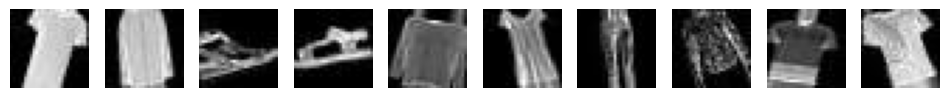

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the augmented image folder
augmented_folder = '/content/augmented_images'

# Get a list of augmented image files
augmented_files = [os.path.join(augmented_folder, file) for file in os.listdir(augmented_folder) if file.endswith('.jpg')]

# Display some of the augmented images
num_images = 10

plt.figure(figsize=(12, 8))
for i in range(num_images):
    image_path = augmented_files[i]
    image = mpimg.imread(image_path)

    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.axis('off')

plt.show()


In [ ]:
os.makedirs("enhanced_images", exist_ok=True)

# Define the image folder and the new folder for enhanced images
image_folder = "/content/fashion_images"
enhanced_folder = "/content/enhanced_images"

# Define the image enhancement parameters
brightness_factor = 1.5
contrast_factor = 1.2

# Iterate over the images in the image folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)

        # Apply image enhancement techniques
        enhanced_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)
        enhanced_image = cv2.convertScaleAbs(enhanced_image, alpha=contrast_factor, beta=0)

        # Save the enhanced image to the new folder
        enhanced_path = os.path.join(enhanced_folder, filename)
        cv2.imwrite(enhanced_path, enhanced_image)


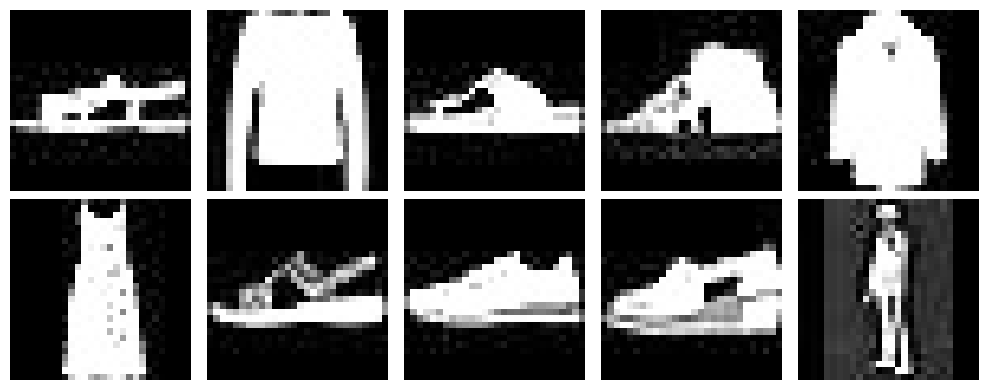

In [ ]:
#Path to the folder containing enhanced images
enhanced_folder = "/content/enhanced_images"

# Get the list of image files in the folder
image_files = [os.path.join(enhanced_folder, file) for file in os.listdir(enhanced_folder) if file.endswith(".jpg")]
num_images = min(len(image_files), 10)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i in range(num_images):
    # Read the image
    image = cv2.imread(image_files[i])

    # Display the image
    row_idx = i // 5
    col_idx = i % 5
    axes[row_idx, col_idx].imshow(image)
    axes[row_idx, col_idx].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
def process_images_and_save(folder, save_folder):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_gray = cv2.resize(img_gray, (28, 28))
            img_gray = img_gray.astype(np.uint8)

            # Apply blurring
            blurred_image = cv2.GaussianBlur(img_gray, (5, 5), 0)

            # Apply edge detection
            edges = cv2.Canny(blurred_image, 50, 150)

            # Save processed images to the new folder
            filename_no_ext = os.path.splitext(filename)[0]
            cv2.imwrite(os.path.join(save_folder, f"{filename_no_ext}_blurred.jpg"), blurred_image)
            cv2.imwrite(os.path.join(save_folder, f"{filename_no_ext}_edges.jpg"), edges)

# Specify the folder paths
enhanced_folder = "/content/enhanced_images"
processed_folder = "/content/edgy_images"

# Create the processed folder if it doesn't exist
if not os.path.exists(processed_folder):
    os.makedirs(processed_folder)

# Process the enhanced images and save them to the processed folder
process_images_and_save(enhanced_folder, processed_folder)


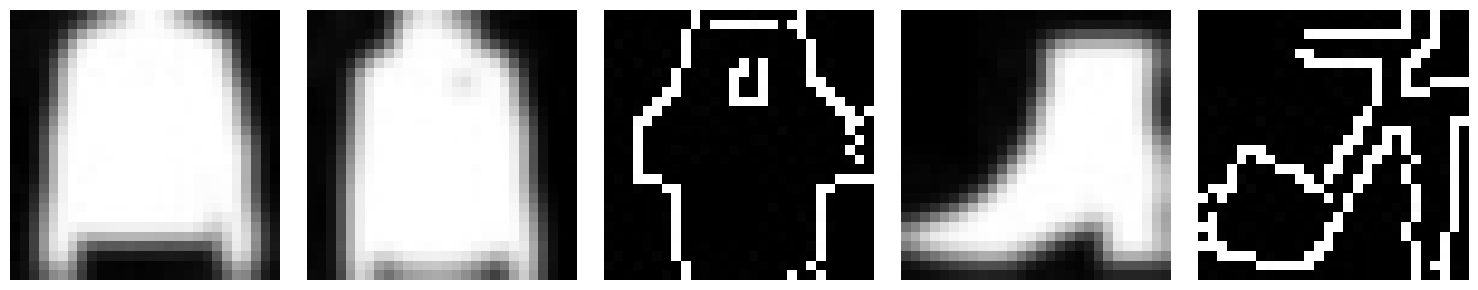

In [ ]:
import matplotlib.pyplot as plt
import os

def display_processed_images(folder):
    # Get the file paths of the processed images
    image_files = [os.path.join(folder, filename) for filename in os.listdir(folder) if filename.endswith(('.jpg', '.jpeg', '.png'))]

    # Select a subset of images to display
    num_images_to_display = 5
    selected_images = image_files[:num_images_to_display]

    # Create a figure and axes for displaying the images
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

    for i, image_path in enumerate(selected_images):
        # Load and display the image
        image = plt.imread(image_path)
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Specify the processed folder path
processed_folder = "/content/edgy_images"

# Display some of the processed images
display_processed_images(processed_folder)


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=50)
y_test = keras.utils.to_categorical(y_test, num_classes=50)

Epoch 1/10
469/469 [==============================] - 64s 133ms/step - loss: 0.6631 - accuracy: 0.7677
Epoch 2/10
469/469 [==============================] - 61s 129ms/step - loss: 0.3852 - accuracy: 0.8625
Epoch 3/10
469/469 [==============================] - 59s 126ms/step - loss: 0.3371 - accuracy: 0.8801
Epoch 4/10
469/469 [==============================] - 60s 127ms/step - loss: 0.3077 - accuracy: 0.8901
Epoch 5/10
469/469 [==============================] - 57s 121ms/step - loss: 0.2839 - accuracy: 0.8975
Epoch 6/10
469/469 [==============================] - 58s 124ms/step - loss: 0.2658 - accuracy: 0.9042
Epoch 7/10
469/469 [==============================] - 62s 132ms/step - loss: 0.2477 - accuracy: 0.9107
Epoch 8/10
469/469 [==============================] - 62s 132ms/step - loss: 0.2338 - accuracy: 0.9155
Epoch 9/10
469/469 [==============================] - 59s 127ms/step - loss: 0.2210 - accuracy: 0.9198
Epoch 10/10
313/313 [==============================] - 4s 13ms/step - los

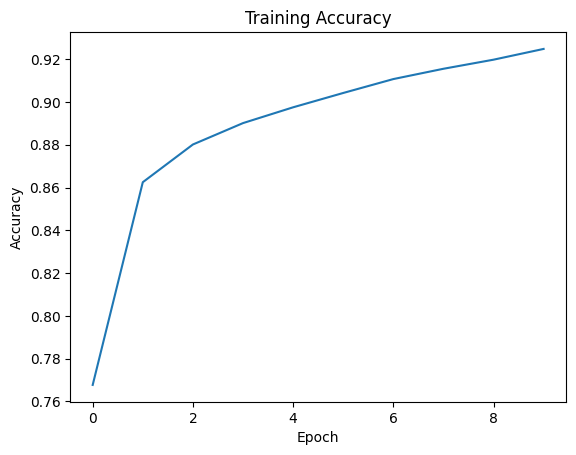

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=50)
y_test = keras.utils.to_categorical(y_test, num_classes=50)

# Build the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(50, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
saved_model=model.save('./fashion_item_classification.h5')

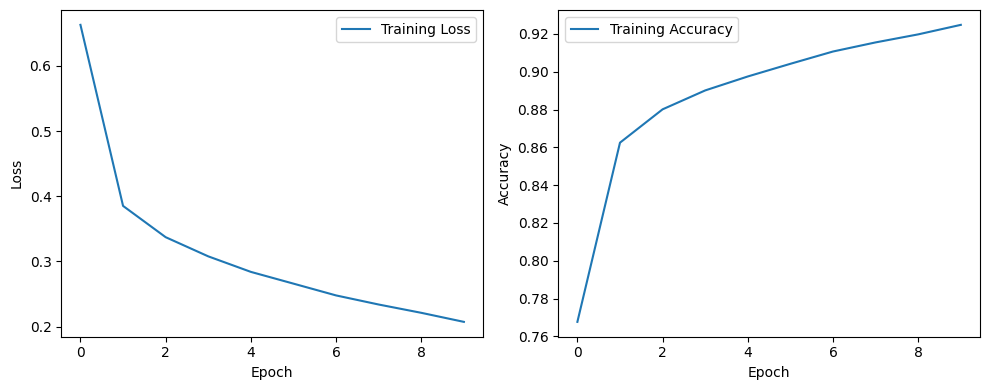

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()








In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# import cv2
# import numpy as np

# Load the trained model
model = keras.models.load_model('/content/fashion_item_classification.h5')

# Define the class labels
class_labels = {
   0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
    10: "Hat",
    11: "Glove",
    12: "Socks",
    13: "Scarf",
    14: "Dress shoes",
    15: "Sweater",
    16: "Jumpsuit",
    17: "Blazer",
    18: "Bootcut pants",
    19: "Belt",
    20: "Cardigan",
    21: "Earrings",
    22: "Hoodie",
    23: "Jeans",
    24: "Necklace",
    25: "Oxford shoes",
    26: "Polo shirt",
    27: "Ring",
    28: "Shorts",
    29: "Shoulder bag",
    30: "Sunglasses",
    31: "Tank top",
    32: "Tie",
    33: "Tracksuit",
    34: "Watch",
    35: "Wedding dress",
    36: "Ballet flats",
    37: "Blouse",
    38: "Bucket bag",
    39: "Cap",
    40: "Cropped pants",
    41: "Espadrilles",
    42: "Flip-flops",
    43: "Handbag",
    44: "High heels",
    45: "Laptop bag",
    46: "Mules",
    47: "Pleated skirt",
    48: "Sandals",
    49: "Tote bag"
}

# Load and preprocess the new image
image_paths = ['/content/bag_img.jfif']

# Predict and print the results for each image
for image_path in image_paths:
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (28, 28))
    image = image.reshape(1, 28, 28, 1) / 255.0

    # Make a prediction
    predictions = model.predict(image)
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]

    # Print the predicted class index and label
    print("Image:", image_path)
    print("Predicted Class Index:", predicted_class_index)
    print("Predicted Class Label:", predicted_class_label)
    print()


1/1 [==============================] - 0s 149ms/step
Image: /content/bag_img.jfif
Predicted Class Index: 8
Predicted Class Label: Bag



In [ ]:
test_X = np.asfarray(x_test)

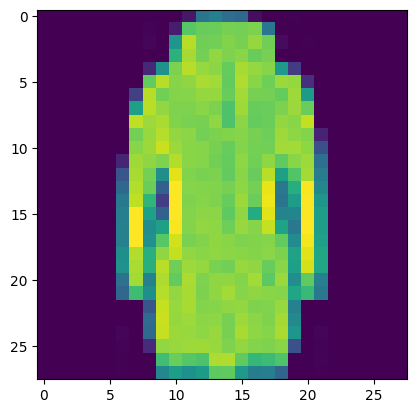

In [ ]:
import random
rand_int = random.randint(30,len(test_X))
target = test_X[rand_int]
plt.imshow(target)

In [ ]:
target = target.reshape(1,28,28,1)

In [ ]:
label = model.predict(target)
index = np.argmax(label)
label = class_labels[index]
print(label)

1/1 [==============================] - 0s 23ms/step
Coat


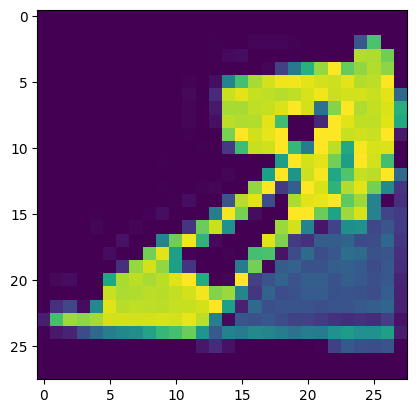

In [ ]:
import random
rand_int = random.randint(4,len(test_X))
target = test_X[rand_int]
plt.imshow(target)

In [ ]:
target = target.reshape(1,28,28,1)

In [ ]:
label = model.predict(target)
index = np.argmax(label)
label = class_labels[index]
print(label)

1/1 [==============================] - 0s 38ms/step
Sandal


In [ ]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
    "Hat",
    "Glove",
    "Socks",
    "Scarf",
    "Dress shoes",
    "Sweater",
    "Jumpsuit",
    "Blazer",
    "Bootcut pants",
    "Belt",
    "Cardigan",
    "Earrings",
    "Hoodie",
    "Jeans",
    "Necklace",
    "Oxford shoes",
    "Polo shirt",
    "Ring",
    "Shorts",
    "Shoulder bag",
    "Sunglasses",
    "Tank top",
    "Tie",
    "Tracksuit",
    "Watch",
    "Wedding dress",
    "Ballet flats",
    "Blouse",
    "Bucket bag",
    "Cap",
    "Cropped pants",
    "Espadrilles",
    "Flip-flops",
    "Handbag",
    "High heels",
    "Laptop bag",
    "Mules",
    "Pleated skirt",
    "Sandals",
    "Tote bag"
]


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (28, 28))
            img = img / 255.0
            images.append(img)
            labels.append(class_labels)  # Assuming the file name is in the format "label_image.png"
    return np.array(images), np.array(labels)

# Load the images and labels
folder = '/content/edgy_images'  # Update with the path to your folder containing images
images, labels = load_images_from_folder(folder)

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to have a single channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Print the shape of the train and test sets
print("Train set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Train set shape: (112000, 28, 28, 1) (112000, 50)
Test set shape: (28000, 28, 28, 1) (28000, 50)


In [ ]:
from tensorflow import keras
# Define the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(50, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train-test split
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to have a single channel
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Split the data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Train the model
hist2=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print("Train loss:", test_loss)
print("Train accuracy:", test_accuracy)


Epoch 1/10
1500/1500 [==============================] - 74s 49ms/step - loss: 0.5191 - accuracy: 0.8146 - val_loss: 0.3813 - val_accuracy: 0.8580
Epoch 2/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.3358 - accuracy: 0.8779 - val_loss: 0.3218 - val_accuracy: 0.8812
Epoch 3/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2885 - accuracy: 0.8945 - val_loss: 0.3011 - val_accuracy: 0.8929
Epoch 4/10
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2537 - accuracy: 0.9066 - val_loss: 0.2855 - val_accuracy: 0.8975
Epoch 5/10
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2291 - accuracy: 0.9149 - val_loss: 0.2533 - val_accuracy: 0.9071
Epoch 6/10
1500/1500 [==============================] - 80s 53ms/step - loss: 0.2057 - accuracy: 0.9231 - val_loss: 0.2555 - val_accuracy: 0.9072
Epoch 7/10
1500/1500 [==============================] - 64s 43ms/step - loss: 0.1843 - accuracy: 0.9313 - val_loss: 0.2525 -

In [ ]:
model.save('Edgy_model.h5')

In [ ]:
model2 = keras.models.load_model('/content/Edgy_model.h5')

In [ ]:
testX = np.asfarray(x_test)

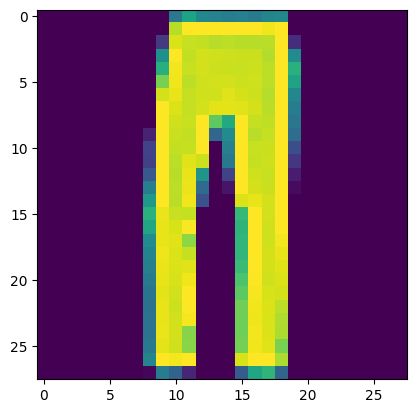

In [ ]:
import random
rand_int = random.randint(10,len(testX))
target = testX[rand_int]
plt.imshow(target)

In [ ]:
target = target.reshape(1,28,28,1)

In [ ]:
label = model.predict(target)
index = np.argmax(label)
label = class_labels[index]
print(label)

1/1 [==============================] - 0s 29ms/step
Trouser
